<a href="https://colab.research.google.com/github/estefanabermeo/Evaluacion/blob/main/Evaluacion_Pt3_Mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EVALUACIÓN PARTE 3 DF MÉXICO**
#### Estefana Bermeo Severiano
#### A01367558

In [1]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.5/215.5 kB 3.9 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=1242195a914c87c5b2c05d8fc985ceedd35f38878692c3eaafe55ad49b104eda
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [2]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [4]:
#Carga desde un archivo .csv sin indice
mex= pd.read_csv("mexico_limpio.csv") 

<ipython-input-4-fadb396e3cd4>:2: DtypeWarning: Columns (0,2,8,24,62) have mixed types. Specify dtype option on import or set low_memory=False.
  mex= pd.read_csv("mexico_limpio.csv")


In [5]:
#Verificamos información del DataFrame
mex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24225 entries, 0 to 24224
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24225 non-null  object 
 1   listing_url                                   24225 non-null  object 
 2   scrape_id                                     24225 non-null  object 
 3   last_scraped                                  24225 non-null  object 
 4   source                                        24225 non-null  object 
 5   name                                          24225 non-null  object 
 6   description                                   24225 non-null  object 
 7   picture_url                                   24225 non-null  object 
 8   host_id                                       24225 non-null  object 
 9   host_url                                      24225 non-null 

In [6]:
#Imprimo los primeros 5 registro del dataframe
mex.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neiborhood_overview.1
0,2056638,https://www.airbnb.com/rooms/2056638,2.02E+13,30/03/23,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,...,5.00,4.95,5.00,4.86,3.0,3.0,0.0,0.0,0.19,--
1,2072354,https://www.airbnb.com/rooms/2072354,2.02E+13,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,...,4.93,5.00,4.95,4.84,2.0,2.0,0.0,0.0,0.54,"Located in Coyoacan, in a quiet neighborhood w..."
2,696037,https://www.airbnb.com/rooms/696037,2.02E+13,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,...,4.92,4.92,4.58,4.71,3.0,3.0,0.0,0.0,0.31,"This area is called Nuevo Polanco, it has bein..."
3,35797,https://www.airbnb.com/rooms/35797,2.02E+13,29/03/23,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,...,0.00,0.00,0.00,0.00,1.0,1.0,0.0,0.0,0.00,"Centro comercial Santa Fe, parque interlomas y..."
4,44616,https://www.airbnb.com/rooms/44616,2.02E+13,30/03/23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,...,4.87,4.78,4.98,4.48,12.0,3.0,2.0,0.0,0.46,--


In [7]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(mex)

                         id  frequency  percentage  cumulative_perc
0      786000000000000000.0         88    0.003633         0.003633
1      817000000000000000.0         81    0.003344         0.006976
2      839000000000000000.0         72    0.002972         0.009948
3      807000000000000000.0         65    0.002683         0.012632
4      838000000000000000.0         61    0.002518         0.015150
...                     ...        ...         ...              ...
15536              29574790          1    0.000041         0.999835
15537              29880380          1    0.000041         0.999876
15538              29338328          1    0.000041         0.999917
15539              29338646          1    0.000041         0.999959
15540              38698115          1    0.000041         1.000000

[15541 rows x 4 columns]

----------------------------------------------------------------

                                           listing_url  frequency  percentage  \
0         

## **Variable 1: host_response_time**

In [9]:
var1= freq_tbl(mex['host_response_time'])
var1

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,16996,0.701589,0.701618
1,--,3091,0.127595,0.829219
2,within a few hours,1966,0.081156,0.910378
3,within a day,1450,0.059856,0.970236
4,a few days or more,720,0.029721,0.999959
5,1 bath,1,0.000041,1.000000


In [10]:
#Obtengo un filtro de los valores más reelevantes 
Filtro= var1[var1['frequency']>100]
Filtro

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,16996,0.701589,0.701618
1,--,3091,0.127595,0.829219
2,within a few hours,1966,0.081156,0.910378
3,within a day,1450,0.059856,0.970236
4,a few days or more,720,0.029721,0.999959


In [11]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('host_response_time')
Filtro_index

,frequency,percentage,cumulative_perc
host_response_time,,,
within an hour,16996,0.701589,0.701618
--,3091,0.127595,0.829219
within a few hours,1966,0.081156,0.910378
within a day,1450,0.059856,0.970236
a few days or more,720,0.029721,0.999959


Text(0, 0.5, 'Frecuencia')

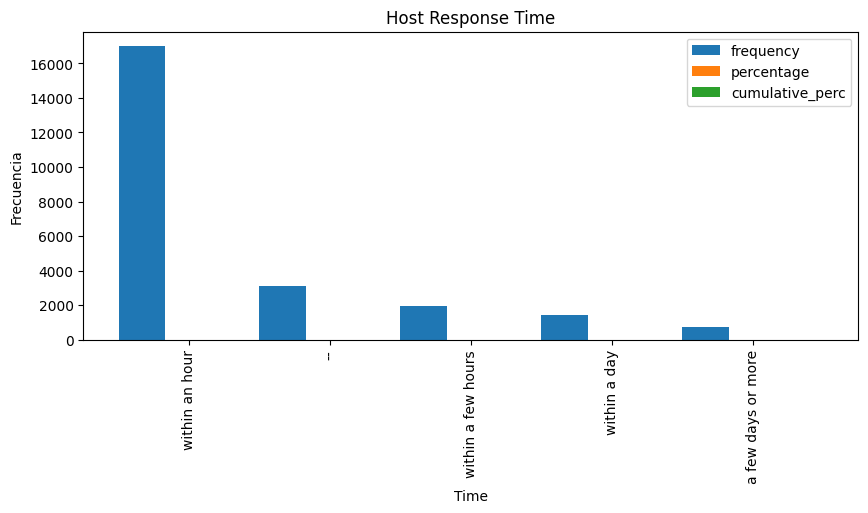

In [12]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Host Response Time')
plt.xlabel('Time')
plt.ylabel('Frecuencia')

<Axes: ylabel='frequency'>

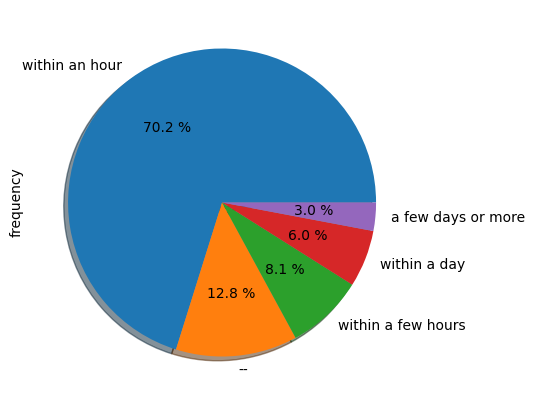

In [13]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variable 2: host_acceptance_rate**

In [14]:
var2= freq_tbl(mex['host_acceptance_rate'])
var2

,host_acceptance_rate,frequency,percentage,cumulative_perc
0,100%,11616,0.479505,0.479524
1,0%,2744,0.113271,0.592801
2,99%,2704,0.111620,0.704425
3,98%,1031,0.042559,0.746986
4,97%,711,0.029350,0.776338
...,...,...,...,...
86,300%,1,0.000041,0.999835
87,9%,1,0.000041,0.999876
88,13%,1,0.000041,0.999917
89,18%,1,0.000041,0.999959


In [15]:
#Obtengo un filtro de los valores más reelevantes 
Filtro2= var2[var2['frequency']>500]
Filtro2

,host_acceptance_rate,frequency,percentage,cumulative_perc
0,100%,11616,0.479505,0.479524
1,0%,2744,0.113271,0.592801
2,99%,2704,0.111620,0.704425
3,98%,1031,0.042559,0.746986
4,97%,711,0.029350,0.776338
5,96%,575,0.023736,0.800074


In [16]:
#Ajusto el indice de mi dataframe
Filtro_index2= Filtro2.set_index('host_acceptance_rate')
Filtro_index2

,frequency,percentage,cumulative_perc
host_acceptance_rate,,,
100%,11616,0.479505,0.479524
0%,2744,0.113271,0.592801
99%,2704,0.111620,0.704425
98%,1031,0.042559,0.746986
97%,711,0.029350,0.776338
96%,575,0.023736,0.800074


Text(0, 0.5, 'Frecuencia')

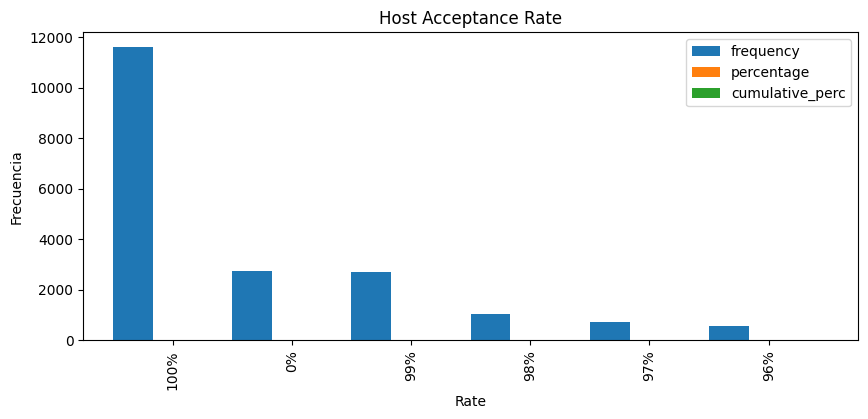

In [17]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index2.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Host Acceptance Rate')
plt.xlabel('Rate')
plt.ylabel('Frecuencia')

<Axes: ylabel='frequency'>

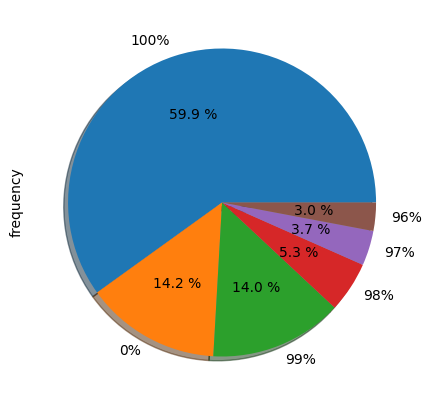

In [18]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index2["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variable 3: host_identity_verified**

In [19]:
var3= freq_tbl(mex['host_identity_verified'])
var3

,host_identity_verified,frequency,percentage,cumulative_perc
0,t,22300,0.920537,0.920575
1,f,1923,0.079381,0.999959
2,05/03/23,1,0.000041,1.000000


In [20]:
#Obtengo un filtro de los valores más reelevantes 
Filtro3= var3[var3['frequency']>1]
Filtro3

,host_identity_verified,frequency,percentage,cumulative_perc
0,t,22300,0.920537,0.920575
1,f,1923,0.079381,0.999959


In [21]:
#Ajusto el indice de mi dataframe
Filtro_index3= Filtro3.set_index('host_identity_verified')
Filtro_index3

,frequency,percentage,cumulative_perc
host_identity_verified,,,
t,22300,0.920537,0.920575
f,1923,0.079381,0.999959


Text(0, 0.5, 'Frecuencia')

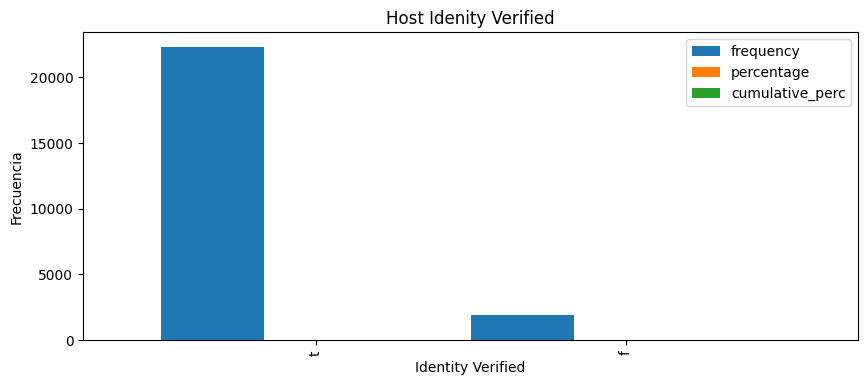

In [22]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index3.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Host Idenity Verified')
plt.xlabel('Identity Verified')
plt.ylabel('Frecuencia')

<Axes: ylabel='frequency'>

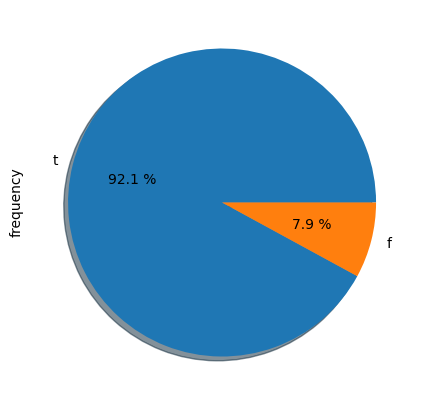

In [23]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index3["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variable 4: property_type**

In [24]:
var4= freq_tbl(mex['property_type'])
var4

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,8144,0.336182,0.336196
1,Entire condo,3363,0.138824,0.475025
2,Private room in rental unit,2860,0.118060,0.593089
3,Private room in home,2009,0.082931,0.676024
4,Entire loft,1584,0.065387,0.741413
...,...,...,...,...
88,Private room in barn,1,0.000041,0.999835
89,Private room in earthen home,1,0.000041,0.999876
90,Shared room in tiny home,1,0.000041,0.999917
91,Private room in tower,1,0.000041,0.999959


In [27]:
#Obtengo un filtro de los valores más reelevantes 
Filtro4= var4[var4['frequency']>1000]
Filtro4

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,8144,0.336182,0.336196
1,Entire condo,3363,0.138824,0.475025
2,Private room in rental unit,2860,0.118060,0.593089
3,Private room in home,2009,0.082931,0.676024
4,Entire loft,1584,0.065387,0.741413
5,Entire serviced apartment,1067,0.044045,0.785461


In [28]:
#Ajusto el indice de mi dataframe
Filtro_index4= Filtro4.set_index('property_type')
Filtro_index4

,frequency,percentage,cumulative_perc
property_type,,,
Entire rental unit,8144,0.336182,0.336196
Entire condo,3363,0.138824,0.475025
Private room in rental unit,2860,0.118060,0.593089
Private room in home,2009,0.082931,0.676024
Entire loft,1584,0.065387,0.741413
Entire serviced apartment,1067,0.044045,0.785461


Text(0, 0.5, 'Frecuencia')

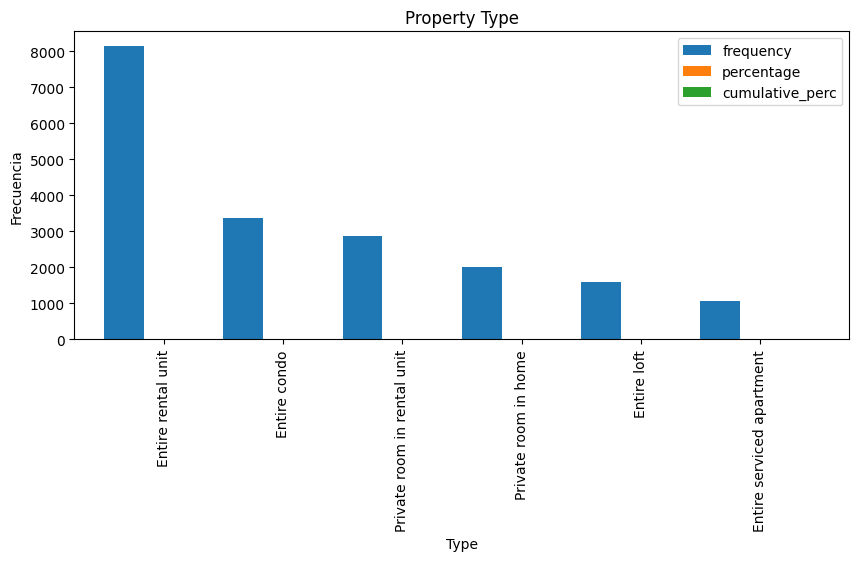

In [29]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index4.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Property Type')
plt.xlabel('Type')
plt.ylabel('Frecuencia')

<Axes: ylabel='frequency'>

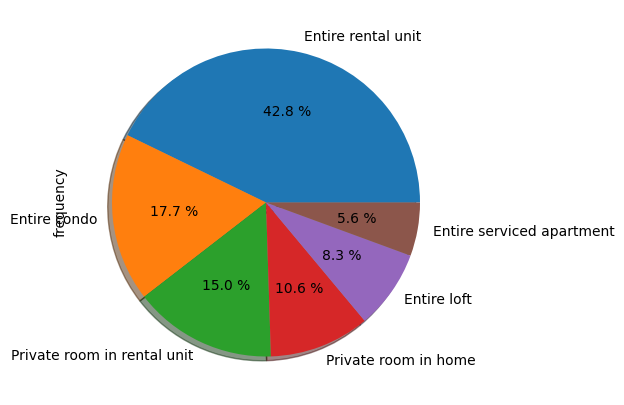

In [30]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index4["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variable 5: bathrooms_text**

In [31]:
var5= freq_tbl(mex['bathrooms_text'])
var5

,bathrooms_text,frequency,percentage,cumulative_perc
0,1 bath,9138,0.377214,0.377229
1,2 baths,4203,0.173498,0.550735
2,1 private bath,3242,0.133829,0.684569
3,1 shared bath,2834,0.116987,0.801560
4,1.5 baths,1395,0.057585,0.859148
5,2.5 baths,858,0.035418,0.894567
6,1.5 shared baths,614,0.025346,0.919914
7,3 baths,458,0.018906,0.938821
8,2 shared baths,307,0.012673,0.951494
9,3.5 baths,248,0.010237,0.961732


In [34]:
#Obtengo un filtro de los valores más reelevantes 
Filtro5= var5[var5['frequency']>600]
Filtro5

,bathrooms_text,frequency,percentage,cumulative_perc
0,1 bath,9138,0.377214,0.377229
1,2 baths,4203,0.173498,0.550735
2,1 private bath,3242,0.133829,0.684569
3,1 shared bath,2834,0.116987,0.801560
4,1.5 baths,1395,0.057585,0.859148
5,2.5 baths,858,0.035418,0.894567
6,1.5 shared baths,614,0.025346,0.919914


In [33]:
#Ajusto el indice de mi dataframe
Filtro_index5= Filtro5.set_index('bathrooms_text')
Filtro_index5

,frequency,percentage,cumulative_perc
bathrooms_text,,,
1 bath,9138,0.377214,0.377229
2 baths,4203,0.173498,0.550735
1 private bath,3242,0.133829,0.684569
1 shared bath,2834,0.116987,0.801560
1.5 baths,1395,0.057585,0.859148
2.5 baths,858,0.035418,0.894567
1.5 shared baths,614,0.025346,0.919914
3 baths,458,0.018906,0.938821


Text(0, 0.5, 'Frecuencia')

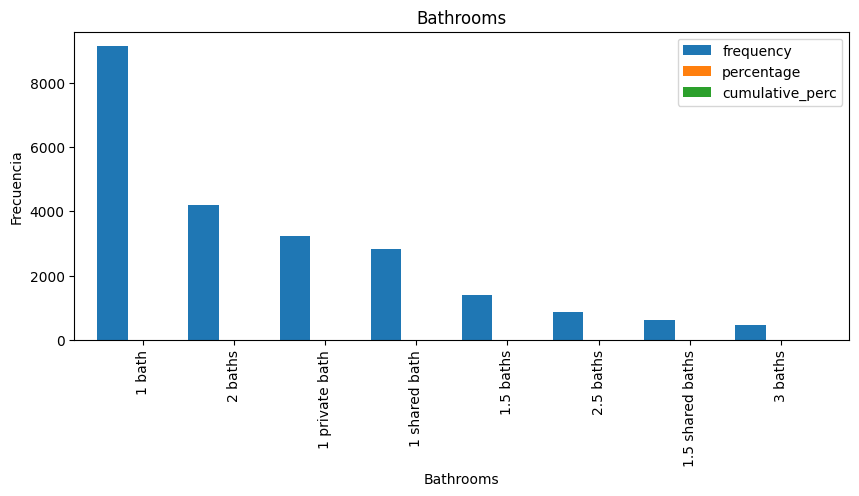

In [35]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index5.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Frecuencia')

<Axes: ylabel='frequency'>

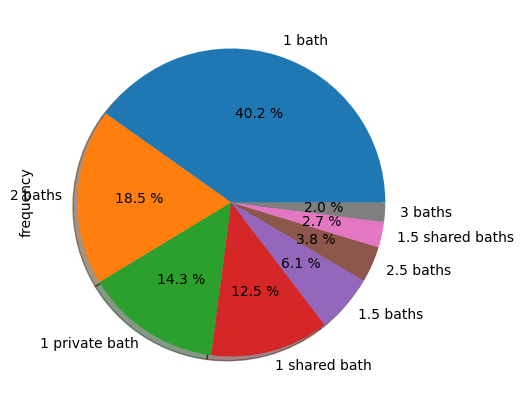

In [36]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index5["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")